In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
import matplotlib.pyplot as plt

LOADING DATASET

In [2]:
crop_directory = 'Peach Crop plant Village DS'

datagen = ImageDataGenerator(
    rescale = 1/255.0,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest',
    validation_split = 0.2
)

train_generator = datagen.flow_from_directory(
    crop_directory,
    target_size = (224,224),
    batch_size = 64,
    class_mode = 'binary',
    shuffle = True,
    subset = 'training'
)

test_generator = datagen.flow_from_directory(
    crop_directory,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary',
    shuffle = True,
    subset = 'validation'
)

Found 2126 images belonging to 2 classes.
Found 531 images belonging to 2 classes.


DEFINING ARCHITECTURE

In [3]:
model = Sequential()

model.add(Conv2D(64,(3,3),activation='relu',input_shape=(224,224,3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

for i in range(2):
    model.add(Conv2D(512,(3,3),activation='relu'))
    model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(120,activation='relu'))
model.add(Dense(84,activation='relu'))
model.add(Dense(2,activation='softmax'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 256)       0

COMPILE MODEL

In [4]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

TRAINING THE MODEL

In [5]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if(logs.get('accuracy')>=0.9800):
            print('\nReached accuracy of 0.9800. So we  stop the Training.')
            self.model.stop_training = True


stop_at =myCallback()


In [6]:
history = model.fit(
    train_generator,
    steps_per_epoch = len(train_generator),
    epochs = 50,
    validation_data = test_generator,
    validation_steps = len(test_generator),
    callbacks = [stop_at]
)

Epoch 1/50
34/34 [==============================] - 202s 6s/step - loss: 0.3403 - accuracy: 0.8829 - val_loss: 0.1435 - val_accuracy: 0.9322
Epoch 2/50
34/34 [==============================] - 212s 6s/step - loss: 0.1658 - accuracy: 0.9393 - val_loss: 0.0809 - val_accuracy: 0.9755
Epoch 3/50
34/34 [==============================] - 220s 6s/step - loss: 0.1528 - accuracy: 0.9285 - val_loss: 0.0749 - val_accuracy: 0.9736
Epoch 4/50
34/34 [==============================] - 245s 7s/step - loss: 0.1422 - accuracy: 0.9445 - val_loss: 0.1213 - val_accuracy: 0.9548
Epoch 5/50
34/34 [==============================] - 252s 7s/step - loss: 0.0935 - accuracy: 0.9638 - val_loss: 0.0684 - val_accuracy: 0.9718
Epoch 6/50
34/34 [==============================] - 265s 8s/step - loss: 0.0685 - accuracy: 0.9708 - val_loss: 0.0666 - val_accuracy: 0.9849
Epoch 7/50
34/34 [==============================] - 298s 9s/step - loss: 0.0603 - accuracy: 0.9741 - val_loss: 0.0751 - val_accuracy: 0.9718
Epoch 8/50
34

PLOTING ACCURACY AND LOSS GRAPHS

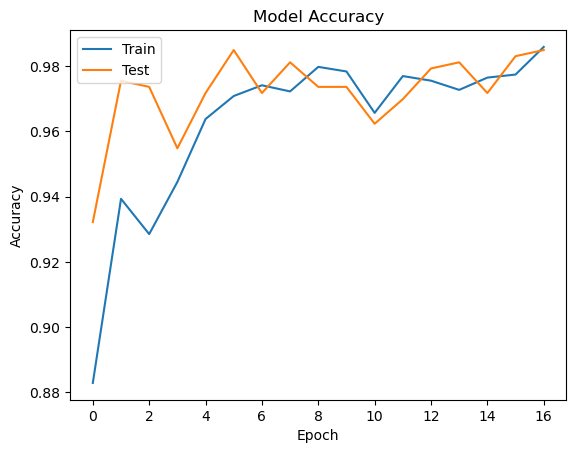

In [7]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'],loc="upper left")
plt.show()

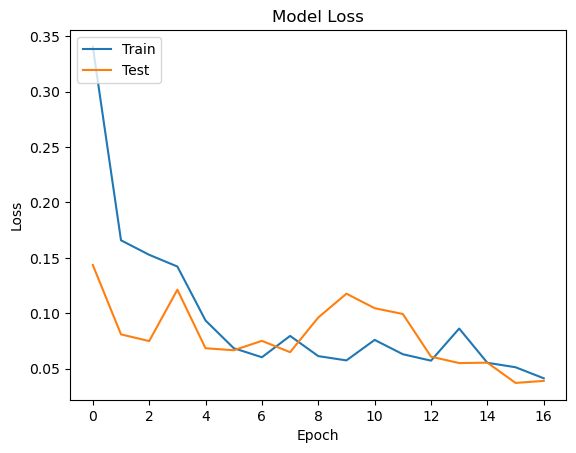

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Test'],loc="upper left")
plt.show()
